In [ ]:
import pandas as pd

studizahlen = pd.read_csv('data/studierendenzahlen_frankfurt_uas.csv', skiprows=3, index_col=0)
studizahlen.head()

In [ ]:
import matplotlib.pyplot as plt

# Extraktion der Daten aus der Tabelle
y_maennlich = studizahlen['männlich']
y_weiblich = studizahlen['weiblich']
semester = studizahlen.index

# Streudiagramm
plt.figure()
plt.scatter(semester, y_maennlich)
plt.scatter(semester, y_weiblich)
plt.xticks(rotation = 45, ha='right')
plt.xlabel('Semester')
plt.ylabel('Anzahl Studierende')
plt.title('Entwicklung der Studierendenzahlen Frankfurt UAS')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

anzahl_semester = len(semester)
x = range(anzahl_semester)

p_maennlich = np.polyfit(x, y_maennlich, 1)
p_weiblich  = np.polyfit(x, y_weiblich, 1)

print(f'Steigung bei der Entwicklung Studenten: {p_maennlich[0]:.2f}')
print(f'Steigung bei der Entwicklung Studentinnen: {p_weiblich[0]:.2f}')

r2_maennlich = r2_score(y_maennlich, np.polyval(p_maennlich, x))
r2_weiblich = r2_score(y_weiblich, np.polyval(p_weiblich, x))

print(f'R2-Score für Studenten: {r2_maennlich:.2f}')
print(f'R2-Score für Studentinnen: {r2_weiblich:.2f}')

In [ ]:
# Erstelle Wertetabelle für das Diagramm
x_modell = np.linspace(0, anzahl_semester)
y_modell_maennlich = np.polyval(p_maennlich, x_modell)
y_modell_weiblich = np.polyval(p_weiblich, x_modell)

# Visualisierung Streudiagramm und Reggressionsgeraden als Liniendiagramm
plt.figure()
plt.scatter(semester, y_maennlich)
plt.scatter(semester, y_weiblich)
plt.plot(x_modell, y_modell_maennlich)
plt.plot(x_modell, y_modell_weiblich)
plt.xticks(rotation = 45, ha='right')
plt.xlabel('Semester')
plt.ylabel('Anzahl Studierende')
plt.title('Entwicklung der Studierendenzahlen Frankfurt UAS')
plt.show()

In [1]:
import pandas as pd

daten = pd.read_csv('data/biersteuerstatistik.csv', skiprows=8)
daten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Jahr                  360 non-null    int64 
 1   Monat                 360 non-null    object
 2   Absatz von Bier [hl]  360 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.6+ KB


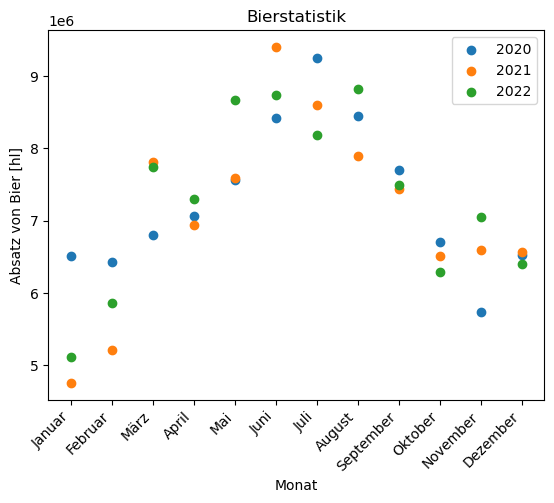

In [4]:
import matplotlib.pyplot as plt

for jahr in [2020, 2021, 2022]:
    daten_pro_jahr = daten.loc[ daten['Jahr'] == jahr ]
    x = daten_pro_jahr.loc[:, 'Monat']
    y = daten_pro_jahr.loc[:, 'Absatz von Bier [hl]'] 
    plt.scatter(x,y, label=str(jahr))
plt.legend()
plt.xticks(rotation = 45, ha='right')
plt.xlabel('Monat')
plt.ylabel('Absatz von Bier [hl]')
plt.title('Bierstatistik')
plt.show()

R2-Score: 0.8


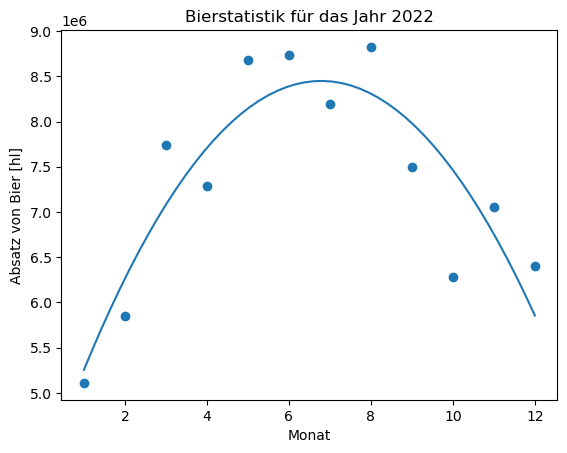

In [6]:
import numpy as np
from sklearn.metrics import r2_score

data_2022 = daten.loc[daten['Jahr'] == 2022]

x = range(1, 13)
y = data_2022.loc[:, 'Absatz von Bier [hl]']

p2022 = np.polyfit(x, y, 2)
r2_score = r2_score(y, np.polyval(p2022, x))
print(f'R2-Score: {r2_score:.1f}')

x_modell = np.linspace(1, 12)
y_modell = np.polyval(p2022, x_modell)

plt.figure()
plt.scatter(x, y)
plt.plot(x_modell, y_modell)
plt.xlabel('Monat')
plt.ylabel('Absatz von Bier [hl]')
plt.title('Bierstatistik für das Jahr 2022')
plt.show()

Vergleich verschiedener Polynomgrade:
Polynomgrad 1: R² = 0.0616
Polynomgrad 2: R² = 0.7307
Polynomgrad 3: R² = 0.7815
Polynomgrad 4: R² = 0.8296


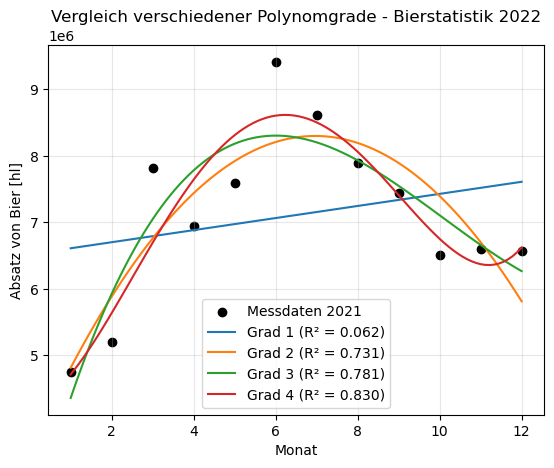


Diskussion der Ergebnisse:
-------------------------
• Grad 1 (linear): R² sehr niedrig, kann die Saisonalität nicht erfassen
• Grad 2 (quadratisch): Deutliche Verbesserung, erfasst den Grundtrend
• Grad 3 (kubisch): Weitere Verbesserung, kann asymmetrische Muster erfassen
• Grad 4: Nur geringfügige Verbesserung, Risiko von Overfitting

Empfehlung: Grad 3 bietet das beste Verhältnis von Anpassung und Einfachheit.

Test mit Polynomgrad 11:
-------------------------
Polynomgrad 11: R² = 1.0000


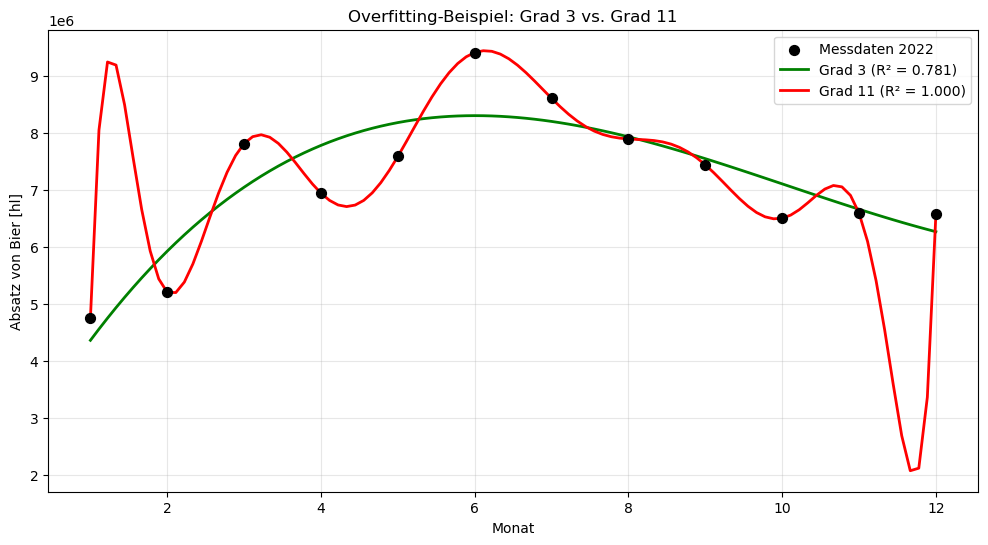


Erklärung zu Grad 11:
Das Polynom 11. Grades hat einen perfekten R²-Wert, aber:
• Es schwingt stark zwischen den Datenpunkten
• Es würde neue Daten schlecht vorhersagen (Overfitting)
• Bei 12 Datenpunkten ist ein Polynom 11. Grades fast eine Interpolation
• Praktisch unbrauchbar für Prognosen oder Interpretation


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Daten laden (gleich wie in Übung 12.3)
daten = pd.read_csv('data/biersteuerstatistik.csv', skiprows=8)
data_2021 = daten.loc[daten['Jahr'] == 2021, :]

# x-Werte (Monate 1-12) und y-Werte (Bierabsatz)
x = range(1, 13)
y = data_2021.loc[:, 'Absatz von Bier [hl]']

# 1-4: Polynomgrade 1 bis 4 berechnen und R²-Werte ermitteln
print("Vergleich verschiedener Polynomgrade:")

r2_werte = {}
modelle = {}

for grad in range(1, 5):
    # Koeffizienten berechnen
    p = np.polyfit(x, y, grad)
    modelle[grad] = p
    
    # Modell anwenden
    y_modell = np.polyval(p, x)
    
    # R²-Wert berechnen
    r2 = r2_score(y, y_modell)
    r2_werte[grad] = r2
    
    print(f"Polynomgrad {grad}: R² = {r2:.4f}")



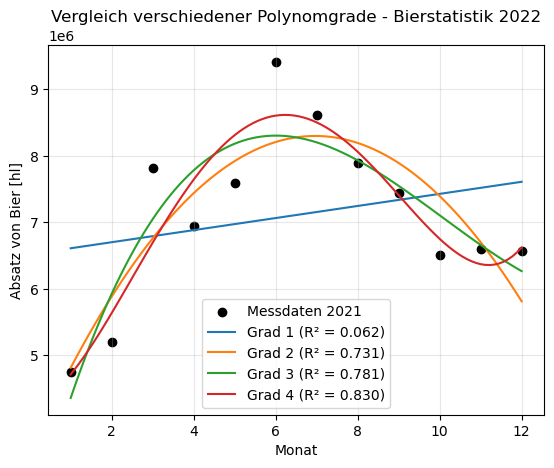

In [10]:
plt.figure()
plt.scatter(x, y, color='black', label='Messdaten 2021')

# x-Werte für glatte Kurven
x_plot = np.linspace(1, 12, 100)
for grad in range(1, 5):
    y_plot = np.polyval(modelle[grad], x_plot)
    plt.plot(x_plot, y_plot, 
             label=f'Grad {grad} (R² = {r2_werte[grad]:.3f})')

plt.xlabel('Monat')
plt.ylabel('Absatz von Bier [hl]')
plt.title('Vergleich verschiedener Polynomgrade - Bierstatistik 2022')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Polynomgrad 11: R² = 1.0000


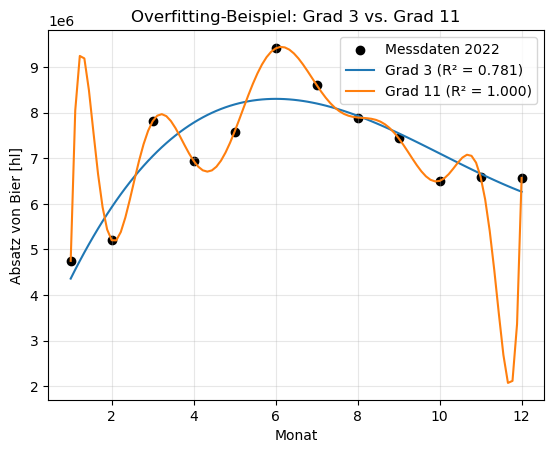


Erklärung zu Grad 11:
Das Polynom 11. Grades hat einen perfekten R²-Wert, aber:
• Es schwingt stark zwischen den Datenpunkten
• Es würde neue Daten schlecht vorhersagen (Overfitting)
• Bei 12 Datenpunkten ist ein Polynom 11. Grades fast eine Interpolation
• Praktisch unbrauchbar für Prognosen oder Interpretation


In [11]:
p_11 = np.polyfit(x, y, 11)
y_modell_11 = np.polyval(p_11, x)
r2_11 = r2_score(y, y_modell_11)

print(f"Polynomgrad 11: R² = {r2_11:.4f}")

# Vergleich: bestes Modell (Grad 3) vs. Overfitting (Grad 11)
y_plot_3 = np.polyval(modelle[3], x_plot)
y_plot_11 = np.polyval(p_11, x_plot)

# Visualisierung von Grad 11
plt.figure()
plt.scatter(x, y, color='black', label='Messdaten 2022')
plt.plot(x_plot, y_plot_3,  label=f'Grad 3 (R² = {r2_werte[3]:.3f})')
plt.plot(x_plot, y_plot_11, label=f'Grad 11 (R² = {r2_11:.3f})')
plt.xlabel('Monat')
plt.ylabel('Absatz von Bier [hl]')
plt.title('Overfitting-Beispiel: Grad 3 vs. Grad 11')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nErklärung zu Grad 11:")
print("Das Polynom 11. Grades hat einen perfekten R²-Wert, aber:")
print("• Es schwingt stark zwischen den Datenpunkten")
print("• Es würde neue Daten schlecht vorhersagen (Overfitting)")
print("• Bei 12 Datenpunkten ist ein Polynom 11. Grades fast eine Interpolation")
print("• Praktisch unbrauchbar für Prognosen oder Interpretation")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 1. Datenexploration
print("=== DATENEXPLORATION ===")
data = pd.read_csv('data/stromverbrauch_hessen.csv', skiprows=4)
print("Datensatz-Info:")
print(data.info())
print("\nErste 5 Zeilen:")
print(data.head())
print("\nStatistische Kennzahlen:")
print(data.describe())

=== DATENEXPLORATION ===
Datensatz-Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                                                               Non-Null Count  Dtype
---  ------                                                               --------------  -----
 0   Jahr                                                                 22 non-null     int64
 1   insgesamt                                                            22 non-null     int64
 2   Industrie                                                            22 non-null     int64
 3   Verkehr                                                              22 non-null     int64
 4   Haushalte, Gewerbe, Handel, Dienstleistungen und übrige Verbraucher  22 non-null     int64
dtypes: int64(5)
memory usage: 1012.0 bytes
None

Erste 5 Zeilen:
   Jahr  insgesamt  Industrie  Verkehr  \
0  2000      34958      11376     1875   
1  2001      34588      11454      